In [1]:
import numpy as np
from sklearn import preprocessing

In [6]:
feature = np.array([[-500.5], [-100.1], [0], [100.1], [900.9]])

In [13]:
minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))

In [16]:
minmax_scale = preprocessing.MinMaxScaler(feature_range=(-100, 100))

In [17]:
scaled_feature = minmax_scale.fit_transform(feature)

In [18]:
scaled_feature

array([[-100.        ],
       [ -42.85714286],
       [ -28.57142857],
       [ -14.28571429],
       [ 100.        ]])

In [20]:
x = np.array([[-1000.1], [-200.2], [500.5], [600.6], [9000.9]])

In [21]:
scaler = preprocessing.StandardScaler()

In [23]:
standarized = scaler.fit_transform(x)

In [26]:
standarized

array([[-0.76058269],
       [-0.54177196],
       [-0.35009716],
       [-0.32271504],
       [ 1.97516685]])

In [27]:
import pandas as pd

In [93]:
df = pd.read_csv("Practice_File.csv")

In [94]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [95]:
df.shape

(1460, 81)

In [96]:
df = df[['SalePrice', 'LotArea']]
df.describe()

,SalePrice,LotArea
count,1460.000000,1460.000000
mean,180921.195890,10516.828082
std,79442.502883,9981.264932
min,34900.000000,1300.000000
25%,129975.000000,7553.500000
50%,163000.000000,9478.500000
75%,214000.000000,11601.500000
max,755000.000000,215245.000000


In [32]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

SalePrice    84025.0
LotArea       4048.0
dtype: float64


In [33]:
sale_price_Q1 = df['SalePrice'].quantile(0.25)
sale_price_Q3 = df['SalePrice'].quantile(0.75)
sale_price_IQR = sale_price_Q3 - sale_price_Q1
print(sale_price_IQR)

84025.0


In [35]:
boundary = [sale_price_Q3 + 1.5 * sale_price_IQR, sale_price_Q1 - 1.5 * sale_price_IQR]
boundary

[340037.5, 3937.5]

In [39]:
df_without_outlier = df[df['SalePrice'] > boundary[1]]
df_without_outlier = df_without_outlier[df_without_outlier['SalePrice'] < boundary[0]]
df_without_outlier.shape

(1399, 2)

In [42]:
df_without_outlier = df[(df['SalePrice'] > boundary[1]) & (df['SalePrice'] < boundary[0])]
df_without_outlier.shape

(1399, 2)

In [43]:
df_with_outlier = df[(df['SalePrice'] < boundary[1]) | (df['SalePrice'] > boundary[0])]
df_with_outlier.shape

(61, 2)

In [44]:
lot_area_Q1 = df['LotArea'].quantile(0.25)
lot_area_Q3 = df['LotArea'].quantile(0.75)
lot_area_IQR = lot_area_Q3 - lot_area_Q1
print(lot_area_IQR)
boundary = [lot_area_Q3 + 1.5 * lot_area_IQR, lot_area_Q1 - 1.5 * lot_area_IQR]
boundary
df_without_outlier = df_without_outlier[(df['LotArea'] > boundary[1]) & (df['LotArea'] < boundary[0])]

4048.0


/var/folders/4z/9ddz1dxn051gf97hvy69q3f80000gn/T/ipykernel_66015/4047332977.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_without_outlier = df_without_outlier[(df['LotArea'] > boundary[1]) & (df['LotArea'] < boundary[0])]


In [45]:
df_without_outlier.shape

(1339, 2)

In [71]:
def remove_outliers(dataset):
    original_df = dataset.copy()
    all_columns = dataset.columns
    for ea_columns in all_columns:
        Q1 = dataset[ea_columns].quantile(0.25)
        Q3 = dataset[ea_columns].quantile(0.75)
        IQR = Q3 - Q1
        boundary = [Q1 - (1.5 * IQR), Q3 + (1.5 * IQR)]
        print(dataset.shape, original_df.shape)
        dataset = dataset[(original_df[ea_columns] > boundary[0]) & (original_df[ea_columns] < boundary[1])]
        print(dataset.shape)
    return dataset

In [72]:
remove_outliers(df)

(1460, 2) (1460, 2)
(1399, 2)
(1399, 2) (1460, 2)
(1326, 2)


/var/folders/4z/9ddz1dxn051gf97hvy69q3f80000gn/T/ipykernel_66015/3454527629.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dataset = dataset[(original_df[ea_columns] > boundary[0]) & (original_df[ea_columns] < boundary[1])]


,SalePrice,LotArea
0,208500,8450
1,181500,9600
2,223500,11250
3,140000,9550
4,250000,14260
...,...,...
1455,175000,7917
1456,210000,13175
1457,266500,9042
1458,142125,9717


In [73]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

SalePrice    84025.0
LotArea       4048.0
dtype: float64


In [75]:
print((df < (Q1 - 1.5*IQR)) | (df > (Q3 + 1.5*IQR)))

      SalePrice  LotArea
0         False    False
1         False    False
2         False    False
3         False    False
4         False    False
...         ...      ...
1455      False    False
1456      False    False
1457      False    False
1458      False    False
1459      False    False

[1460 rows x 2 columns]


In [77]:
import matplotlib.pyplot as plt

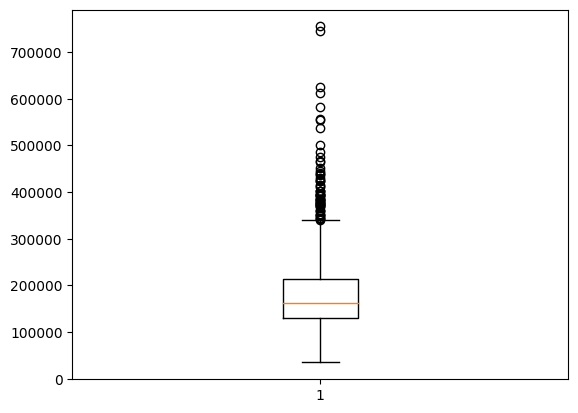

In [78]:
plt.boxplot(df['SalePrice'])
plt.show()

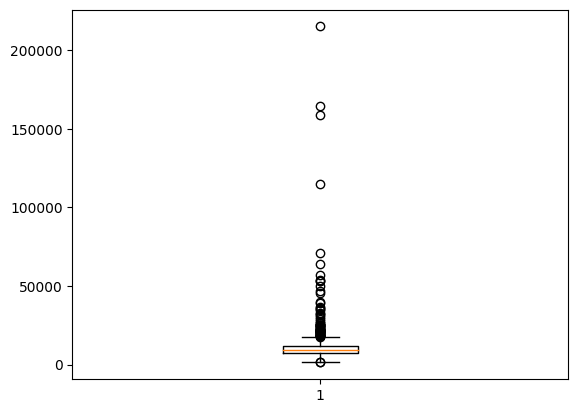

In [79]:
plt.boxplot(df['LotArea'])
plt.show()

<AxesSubplot: >

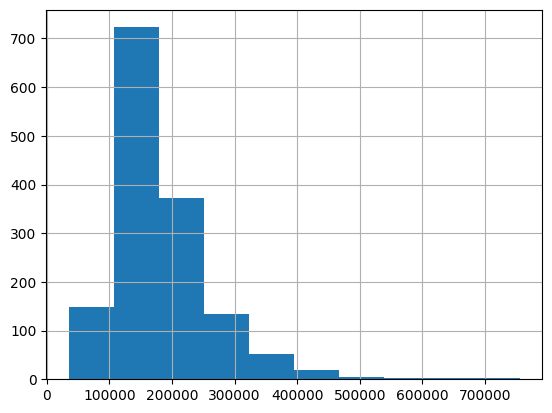

In [81]:
df.SalePrice.hist()

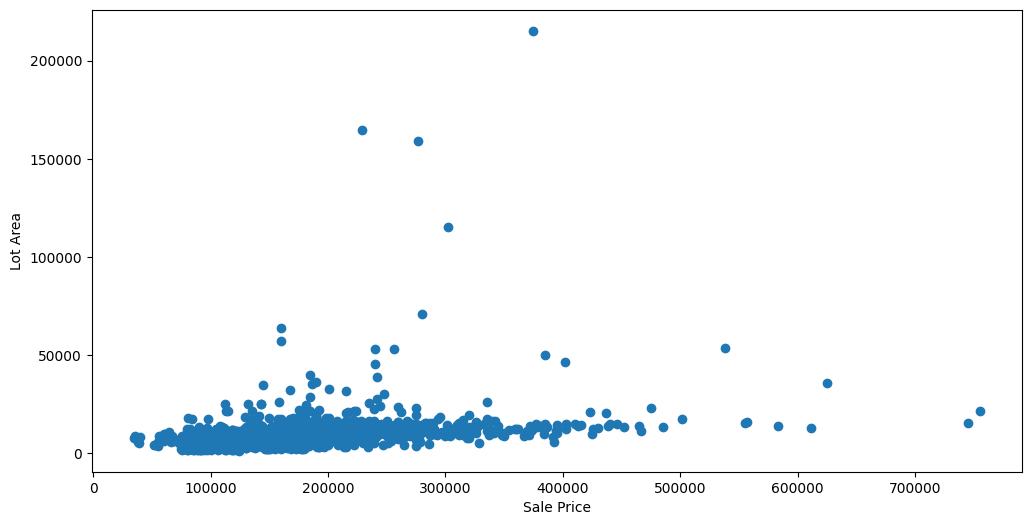

In [82]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(df['SalePrice'], df['LotArea'])
ax.set_xlabel('Sale Price')
ax.set_ylabel('Lot Area')
plt.show()

In [83]:
df['SalePrice'].max()

755000

In [97]:
sale_price_Q1 = df['SalePrice'].quantile(0.25)
sale_price_Q3 = df['SalePrice'].quantile(0.75)
sale_price_IQR = sale_price_Q3 - sale_price_Q1
print(sale_price_IQR)
boundary = [sale_price_Q3 + 1.5 * sale_price_IQR, sale_price_Q1 - 1.5 * sale_price_IQR]
boundary

84025.0


[340037.5, 3937.5]

In [98]:
index = df[(df['SalePrice'] >= boundary[0]) | (df['SalePrice'] <= boundary[1])].index
df.drop(index, inplace=True)
df.shape

(1399, 2)